In [ ]:
import numpy as np
import cv2 as cv
import pandas as pd
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Ag-Bi.PNG to Ag-Bi.PNG
User uploaded file "Ag-Bi.PNG" with length 164053 bytes


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving test_pic2.png to test_pic2 (3).png
User uploaded file "test_pic2.png" with length 105035 bytes


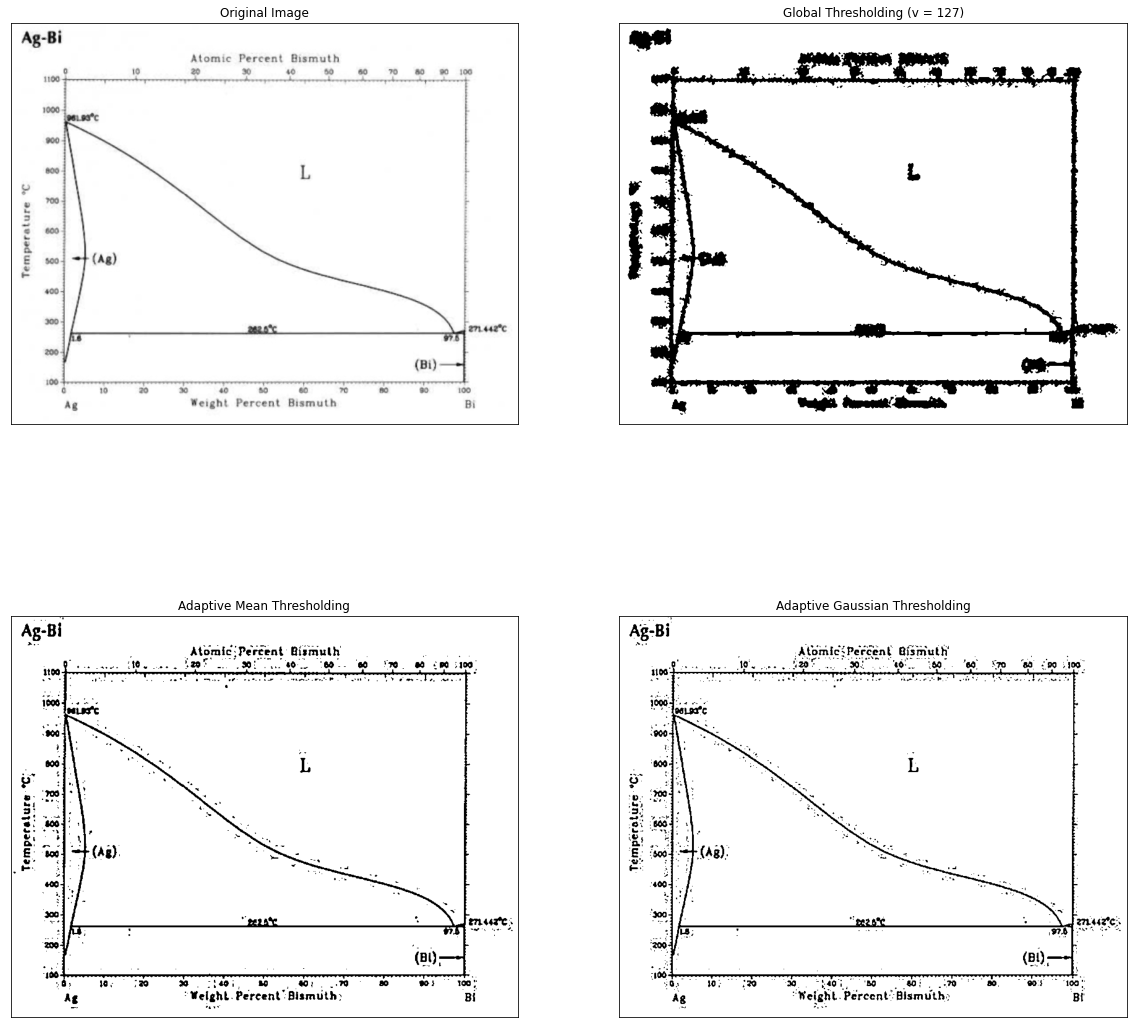

In [ ]:

img2 = cv.imread('Ag-Bi.PNG',0)
img2 = cv.medianBlur(img2,3)
ret,th1 = cv.threshold(img2,250,265,cv.THRESH_BINARY)
th1 = cv.medianBlur(th1,3)

th2 = cv.adaptiveThreshold(img2,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img2,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img2, th1, th2, th3]

figure (figsize=(20,20))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

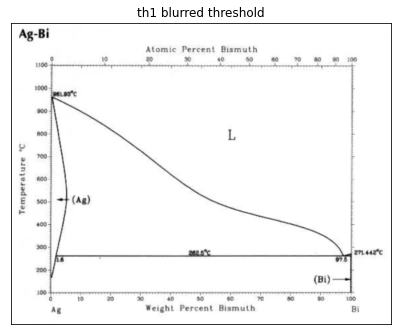

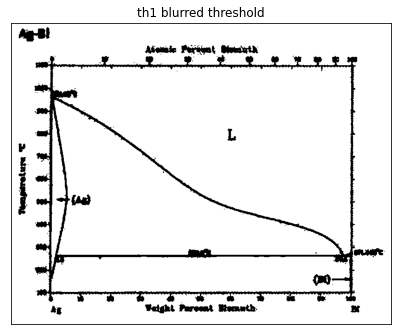

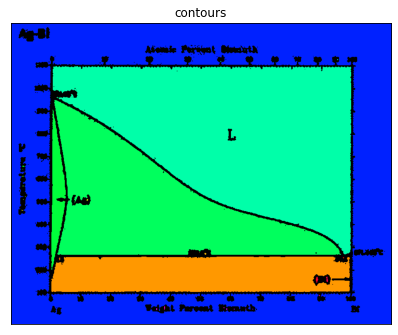

In [ ]:
img3 = cv.imread('Ai-Bi.PNG',0)
img3 = cv.medianBlur(img2,3)
ret,th1 = cv.threshold(img2,245,255,cv.THRESH_BINARY)


num_labels, labels_im, stats_im, centroid_im  = cv.connectedComponentsWithStats(th1)

def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    #cv.imshow('labeled.png', labeled_img)
    figure (figsize=(15,15))
    plt.subplot(121)
    plt.imshow(img2,cmap = 'gray')
    plt.title('th1 blurred threshold'), plt.xticks([]), plt.yticks([])

    figure (figsize=(15,15))
    plt.subplot(121)
    plt.imshow(th1,cmap = 'gray')
    plt.title('th1 blurred threshold'), plt.xticks([]), plt.yticks([])

    figure (figsize=(15,15))
    plt.subplot(122)
    plt.imshow(labeled_img,cmap = 'gray')
    plt.title('contours'), plt.xticks([]), plt.yticks([])

    cv.waitKey()


imshow_components(labels_im)

(Text(0.5, 1.0, 'labelled areas'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

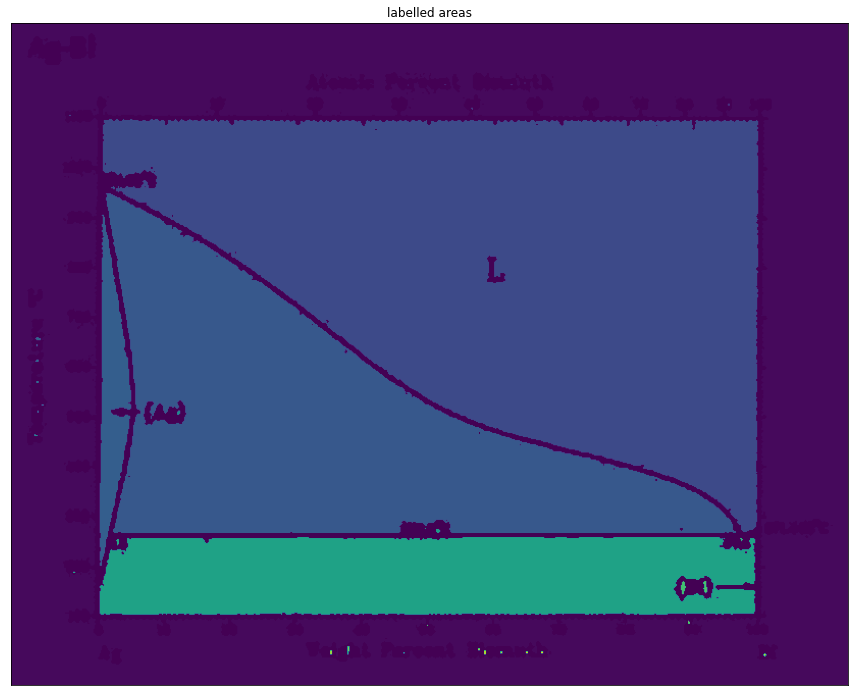

In [ ]:
#num_labels
#labels_im
#stats_im
#centroid_im

figure (figsize=(15,15))
plt.imshow(labels_im)
plt.title('labelled areas'), plt.xticks([]), plt.yticks([])

In [ ]:
#import sys
#import numpy
#import pandas as pd
#numpy.set_printoptions(threshold=sys.maxsize)

#print(labels_im)

#test_dataframe = pd.DataFrame(labels_im)

#pd.set_option('display.max_rows', 650)
#pd.set_option('display.max_columns', 821)
#pd.set_option('display.width', 5000)

#np.set_printoptions(threshold=sys.maxsize)

#print (test_dataframe)

In [ ]:
#[if time is available go back and fix up the characterization to work with dashed lines]
#look at maybe using a vector based edge detector, some type of manual code to fill in between dashed lines or some sort of filter maybe

In [ ]:
#[create a program to clean up the graphs and get rid of text and arrows]

In [ ]:
#[create a program to conver the pixels to weight percentage and temperature values]

In [ ]:
stats_im

array([[    16,     11,    790,    619,  40267],
       [     0,      0,    821,    650, 194696],
       [   503,     59,      2,      2,      4],
       [   389,     61,      1,      2,      2],
       [   425,     61,      2,      1,      2],
       [   490,     61,      2,      1,      2],
       [   703,     80,      2,      2,      4],
       [   451,     84,      2,      2,      3],
       [    57,     91,      2,      1,      2],
       [    90,     95,    643,    405, 156812],
       [    98,    161,      4,      3,      7],
       [    93,    168,    618,    333,  89665],
       [    87,    189,     31,    344,   5683],
       [    24,    309,      5,      3,     11],
       [    25,    316,      1,      2,      2],
       [    24,    331,      3,      2,      5],
       [    25,    352,      2,      2,      4],
       [    30,    375,      2,      1,      2],
       [    26,    381,      1,      2,      2],
       [   163,    381,      3,      4,     10],
       [    23,    4

In [ ]:
#find out what region of the graph the input is in
def phase_finder(y,x):
  iter = 0
  phase = labels_im[y,x]
  #if there are less than 50 pixels for an area it is excluded and the input is moved to a nearby value, it no nearby value works an error message is spit out
  while stats_im[phase,4] < 50:
    x = x+1
    y = y+1
    iter = iter+1
    if iter > 10:
      print('there was an error with the location selected please try again')
      return()
  return(phase)

In [ ]:
labels_im.shape[0]

650

In [ ]:
#placeholder until the program is linked to the input
input_x = 49
input_y = 472
input = [input_y,input_x]

phase = phase_finder(input_y, input_x)

In [ ]:
#finds the min and max values for the x and y of the area

#finding max and min values for y
y_distribution = (np.count_nonzero(labels_im == phase, axis=1))

#finding max and min values for x
x_distribution = (np.count_nonzero(labels_im == phase, axis=0))

#now find the location in which something like 90-99% of the point have been counted and put that as a softmax and put the furthest out point as the hardmax



In [ ]:
labels_im[0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

edit the code below to not be hardcoded and to adjust to the size of the photo

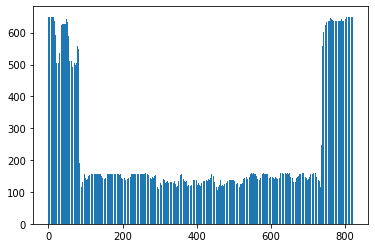

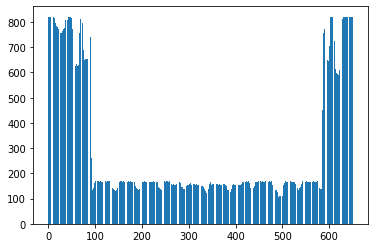

In [ ]:
#Plots the distribution of the pixels along the x axis and the y axis seperately
x_lin = np.linspace(0,labels_im.shape[1],labels_im.shape[1])
plt.bar(x_lin, x_distribution)
plt.show()

y_lin = np.linspace(0,labels_im.shape[0],labels_im.shape[0])
plt.bar(y_lin, y_distribution)
plt.show()

In [ ]:
#finds the min and max values in the x and y direction for the specific phase

ls_x = [i for i, e in enumerate(x_distribution) if e !=0]
x_min = ls_x[0]
x_max = ls_x[len(ls_x)-1]

ls_y = [i for i, e in enumerate(y_distribution) if e !=0]
y_min = ls_y[0]
y_max = ls_y[len(ls_y)-1]


In [ ]:
print ("the maximum x value is ", x_max)
print ("the minimum x value is ", x_min)
print ("the maximum y value is ", y_max)
print ("the minimum y value is ", y_min)

error
